In [2]:
from omigo_core import tsv
from omigo_ext import graphviz_ext

In [3]:
# create some list of vertices
vtsv = tsv.newWithCols(["id", "name", "type"]) \
    .add_map_as_row({"id": "A1", "name": "Chris Evans", "type": "actor"}) \
    .add_map_as_row({"id": "A2", "name": "Robert Downy Jr.", "type": "actor"}) \
    .add_map_as_row({"id": "A3", "name": "Sabastian Stan", "type": "actor"}) \
    .add_map_as_row({"id": "A4", "name": "Scarlett Johansson", "type": "actor"}) \
    .add_map_as_row({"id": "A5", "name": "Tom Holland", "type": "actor"}) \
    .add_map_as_row({"id": "B1", "name": "Captain America", "type": "movie"}) \
    .add_map_as_row({"id": "B2", "name": "Civil War", "type": "movie"}) \
    .add_map_as_row({"id": "B3", "name": "Winter Soldier", "type": "movie"}) \
    .add_map_as_row({"id": "B4", "name": "Avengers", "type": "movie"}) \
    .add_map_as_row({"id": "B5", "name": "Black Widow", "type": "movie"}) \
    .add_map_as_row({"id": "B6", "name": "Spiderman", "type": "movie"}) \
    .add_map_as_row({"id": "B7", "name": "Infinity War", "type": "movie"}) \
    .add_map_as_row({"id": "B8", "name": "Endgame", "type": "movie"})

# create some edges
etsv = tsv.newWithCols(["src", "dst", "type"]) \
    .add_map_as_row({"src": "Chris Evans", "dst": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"src": "Chris Evans", "dst": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Chris Evans", "dst": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"src": "Chris Evans", "dst": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Chris Evans", "dst": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"src": "Robert Downy Jr.", "dst": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"src": "Robert Downy Jr.", "dst": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Robert Downy Jr.", "dst": "Spiderman", "type": "acts_in"}) \
    .add_map_as_row({"src": "Robert Downy Jr.", "dst": "Winter Soldier", "type": "acts_in"}) \
    .add_map_as_row({"src": "Robert Downy Jr.", "dst": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"src": "Scarlett Johansson", "dst": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"src": "Scarlett Johansson", "dst": "Black Widow", "type": "acts_in"}) \
    .add_map_as_row({"src": "Scarlett Johansson", "dst": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"src": "Scarlett Johansson", "dst": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Scarlett Johansson", "dst": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"src": "Tom Holland", "dst": "Spiderman", "type": "acts_in"}) \
    .add_map_as_row({"src": "Tom Holland", "dst": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"src": "Tom Holland", "dst": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Tom Holland", "dst": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Tom Holland", "dst": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"src": "Sabastian Stan", "dst": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"src": "Sabastian Stan", "dst": "Winter Soldier", "type": "acts_in"}) \
    .add_map_as_row({"src": "Sabastian Stan", "dst": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Sabastian Stan", "dst": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"src": "Sabastian Stan", "dst": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"src": "Captain America", "dst": "Winter Soldier", "type": "sequel"}) \
    .add_map_as_row({"src": "Winter Soldier", "dst": "Civil War", "type": "sequel"}) \
    .add_map_as_row({"src": "Avengers", "dst": "Infinity War", "type": "sequel"}) \
    .add_map_as_row({"src": "Infinity War", "dst": "Endgame", "type": "sequel"}) \
    .add_map_as_row({"src": "Chris Evans", "dst": "Sabastian Stan", "type": "friends"}) \
    .add_map_as_row({"src": "Chris Evans", "dst": "Scarlett Johansson", "type": "friends"}) \
    .add_map_as_row({"src": "Robert Downy Jr.", "dst": "Tom Holland", "type": "friends"})


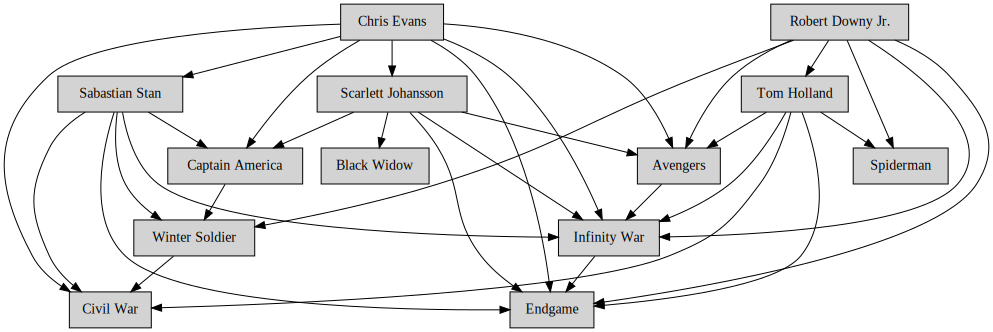

In [4]:
# simple plotting. using default settings
graphviz_ext.plot_graph(vtsv, etsv, "name", "src", "dst")

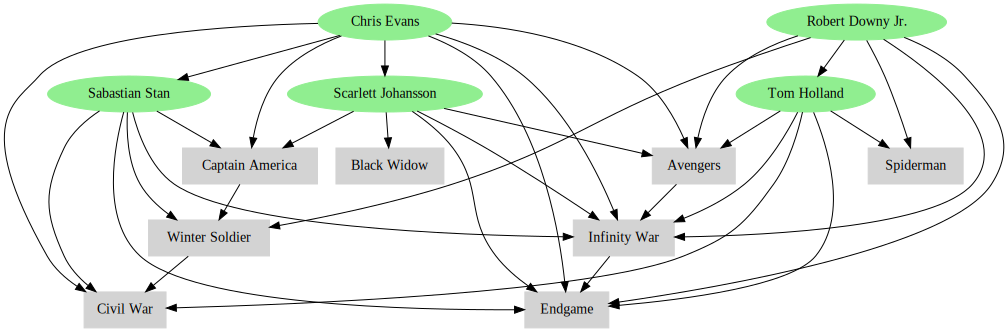

In [5]:
# define custom function to control the style
def custom_style_func(mp):
    props = graphviz_ext.__default_dot_style_func__(mp)
    if (mp["type"] == "actor"):
        props["shape"] = "oval"
        props["color"] = "lightgreen"
    else:
        props["shape"] = "rectangle"
        props["color"] = "lightgrey"        
    return props    

graphviz_ext.plot_graph(vtsv, etsv, "name", "src", "dst", style_func = custom_style_func)

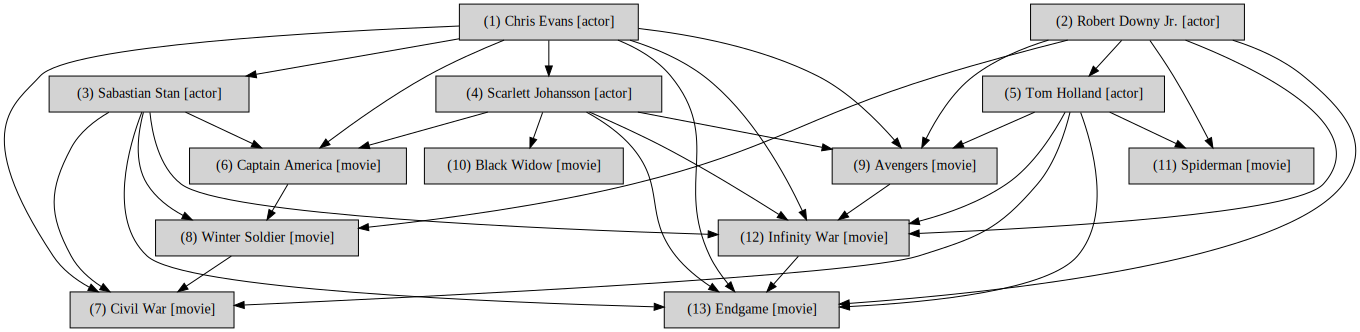

In [6]:
# create new column with custom label information
vtsv2 = vtsv \
    .add_seq_num("index") \
    .transform(["index", "name", "type"], lambda x,y,z: "({}) {} [{}]".format(x, y, z), "display_name")

graphviz_ext.plot_graph(vtsv2, etsv, "name", "src", "dst", vertex_display_id_col = "display_name")